<a href="https://colab.research.google.com/github/MeAmarP/opencv_snipps/blob/master/Helpful_Python_snippets_for_Image_Processing_using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import skimage

In [0]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [0]:
from IPython.display import  Image

@interact
def show_img(file=os.listdir('/content/opencv_snipps/imgs/')):
  display(Image('/content/opencv_snipps/imgs/'+file))

In [5]:
print('OpenCV-Python Lib Version:', cv2.__version__)
print('Skimage Version:', skimage.__version__)
print('Python Version:',sys.version)

OpenCV-Python Lib Version: 3.4.3
Skimage Version: 0.15.0
Python Version: 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]


In [6]:
!git clone https://github.com/MeAmarP/opencv_snipps.git
import os
os.listdir('/content/opencv_snipps/imgs/')

Cloning into 'opencv_snipps'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 53 (delta 15), reused 45 (delta 12), pack-reused 0
Unpacking objects: 100% (53/53), done.


['Wb_girl_rgb.jpg',
 'tank_gry.tiff',
 'skittle_rgb.tiff',
 'lun1_rgb.gif',
 'lena_gry.bmp',
 'bricks_in_wall_bin.tiff',
 'fruitbowl_rgb.jpg',
 'alg_gry.jpg',
 'cells_bin.png']


## 1. Basic I/0: Understand Image and its Represenations in OpenCV
### Types of Images:
+ Binary : 2D Array of pixels,where Pixel Value is either 0 or 255.
+ Grayscale : 2D Array of pixels,where Pixel Value is anything between 0-255 
+ RGB/TrueColor : 3D Array of pixels,where Pixel Value is anything between 0-255 

Note: RGB pixel format is quit standard among MATLAB or other image processing liberaies, but OpenCV uses BGR pixel format.

In [0]:
MainImgBin = cv2.imread('/content/opencv_snipps/imgs/cells_bin.png',cv2.IMREAD_UNCHANGED)
MainImgBGR = cv2.imread('/content/opencv_snipps/imgs/fruitbowl_rgb.jpg',cv2.IMREAD_UNCHANGED)
MainImgGray = cv2.imread('/content/opencv_snipps/imgs/alg_gry.jpg',cv2.IMREAD_UNCHANGED)

print('DatatypeClass of Image:',type(MainImgBGR))
print('Shape/Size of RGB Img:', MainImgBGR.shape)
print('Shape/Size of Gray Img:', MainImgGray.shape)
print('Shape/Size of Binary Img:', MainImgBin.shape)

# Why use cv2.IMREAD_UNCHANGED with IMREAD?
# https://stackoverflow.com/a/18871394
# https://docs.opencv.org/3.4.3/d4/da8/group__imgcodecs.html#gga292d81be8d76901bff7988d18d2b42acae80c3e72393ec86b8ea1db4a2a228b5f

DatatypeClass of Image: <class 'numpy.ndarray'>
Shape/Size of RGB Img: (625, 960, 3)
Shape/Size of Gray Img: (512, 512)
Shape/Size of Binary Img: (476, 638)


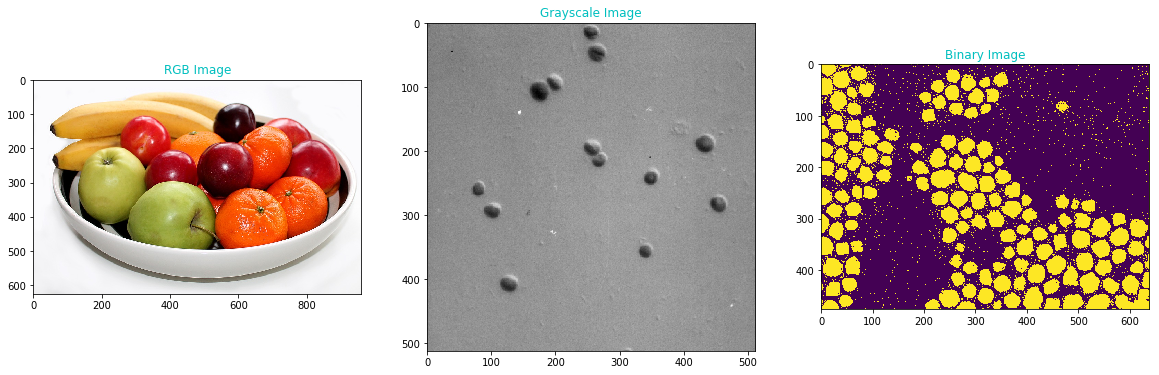

In [0]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
#Note: matplotlib uses RGB format so had to convert BGR-to-RGB
plt.imshow(cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2RGB))
plt.title('RGB Image',color='c')
plt.subplot(1,3,2)
plt.imshow(MainImgGray,cmap='gray')
plt.title('Grayscale Image',color='c')
plt.subplot(1,3,3)
plt.imshow(MainImgBin)
plt.title('Binary Image',color='c')
plt.show()

## 2. Basic Operations:
    - Convert to Gray/Binary
    - Change Colorspaces
    - Resize
    - Flip
    - Rotate
    - Crop

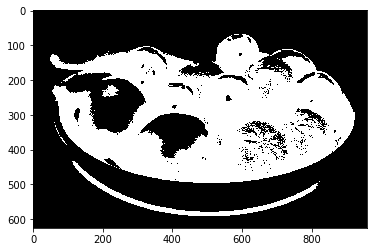

In [0]:
#Convert to Gray
img_gry = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2GRAY)

#Convert to Binary
# Method: Basic Thresholding
ret,img_bin = cv2.threshold(img_gry,127,255,cv2.THRESH_BINARY)
ret,img_bininv = cv2.threshold(img_gry,127,255,cv2.THRESH_BINARY_INV)

# Method: Adaptive Thresholding
img_adp_gusbin = cv2.adaptiveThreshold(img_gry,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,5)
img_adp_meanbin = cv2.adaptiveThreshold(img_gry,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5,5)

# Method: Otsu's Thresholding
ret,img_Otsubin = cv2.threshold(img_gry,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(img_Otsubin,cmap='binary')

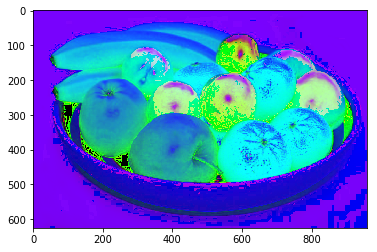

In [0]:
#Changing Color Spaces
img_hls = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2HLS)
img_hsv = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2HSV)
img_lab = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2LAB)
img_yuv = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2YUV)
plt.imshow(img_hsv)

Before Resize:  (625, 960)
After Resize 1:  (400, 400)
After Resize 2:  (400, 800)


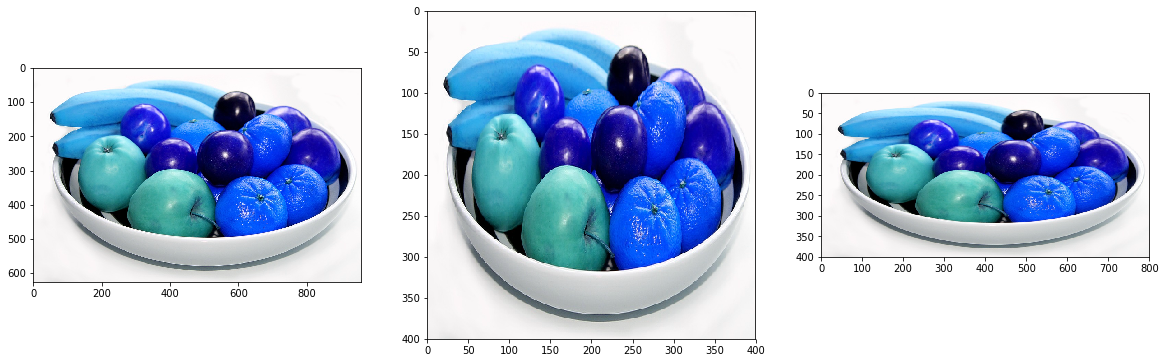

In [0]:
# Resize the image
IMG_WIDTH = 400
IMG_HEIGHT = 400
img = cv2.imread('/content/opencv_snipps/imgs/fruitbowl_rgb.jpg')
print('Before Resize: ',img.shape[:2])

#Try Other Interploation Methods too
re1_img = cv2.resize(img,(IMG_WIDTH,IMG_HEIGHT),interpolation=cv2.INTER_LANCZOS4)
re2_img = cv2.resize(img,(IMG_WIDTH*2,IMG_HEIGHT),interpolation=cv2.INTER_AREA)
print('After Resize 1: ',re1_img.shape[:2])
print('After Resize 2: ',re2_img.shape[:2])
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(re1_img)
plt.subplot(1,3,3)
plt.imshow(re2_img)
plt.show()

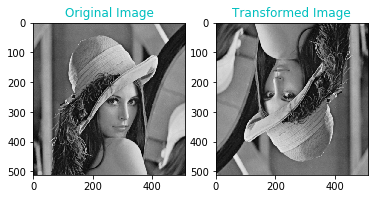

In [0]:
# Flip/Rotate Images
img = cv2.imread('/content/opencv_snipps/imgs/lena_gry.bmp',cv2.IMREAD_UNCHANGED)
rows,cols = img.shape
imgCenter = (cols-1)/2.0,(rows-1)/2.0
rotateAngle = 180
scaleFactor = 1

#Calculate an affine matrix of 2D rotation. 
rotateMat = cv2.getRotationMatrix2D(imgCenter,rotateAngle,scaleFactor)
# Apply an affine transformation to an image. 
out_img = cv2.warpAffine(img,rotateMat,(cols,rows))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original Image',color='c')
plt.subplot(1,2,2)
plt.title('Rotated Image',color='c')
plt.imshow(out_img,cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f75bc63e780>,
 Text(0.5, 1.0, 'Cropped'))

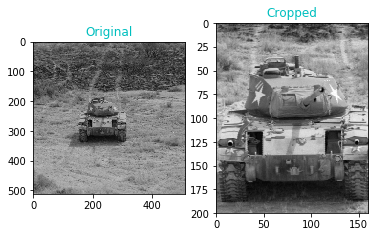

In [0]:
#Crop Images
#Note is more about array slicing. refer row & column vals from x,y-axis for ROI.
img = cv2.imread('/content/opencv_snipps/imgs/tank_gry.tiff',cv2.IMREAD_UNCHANGED)

#Slicing using ROI
cropped = img[150:350,150:310].copy()
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original',color='c')
plt.subplot(122),plt.imshow(cropped,cmap='gray'),plt.title('Cropped',color='c')

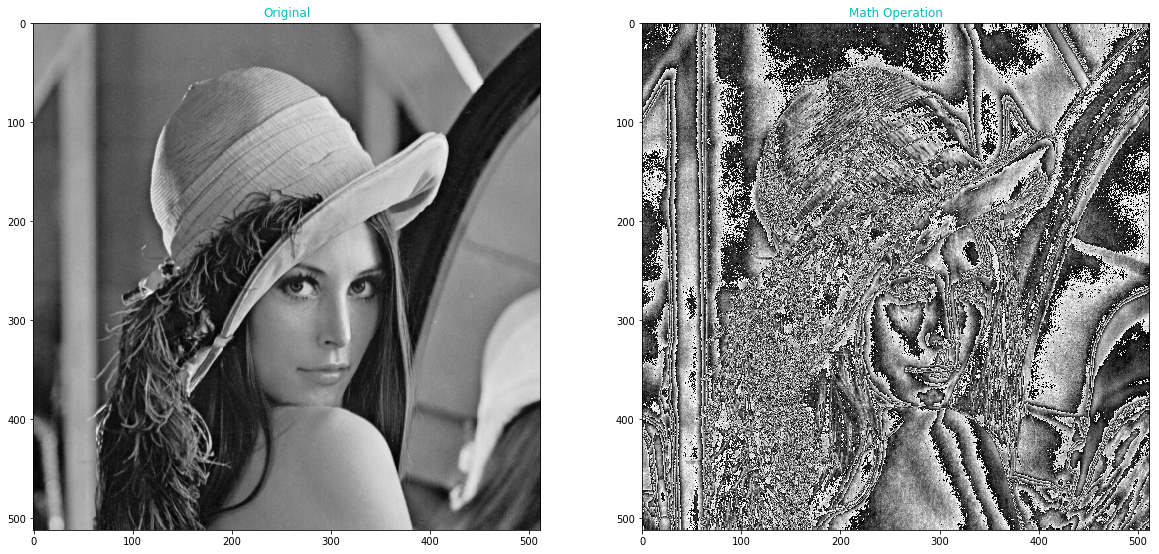

In [0]:
# Image Matrix Operations
img = cv2.imread('/content/opencv_snipps/imgs/lena_gry.bmp',cv2.IMREAD_UNCHANGED)

s_img = img * 10
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original',color='c')
plt.subplot(122),plt.imshow(s_img,cmap='gray'),plt.title('Math Operation',color='c')
plt.show()

In [0]:
print(img[50,50,1])
print(opt_img[50,50,1])

198
248
